In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers


import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[2])
print("\n")
print("Output target: ", y_train[2])

(404, 13)


Input features:  [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
 1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
 3.26000e+00]


Output target:  50.0


In [4]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


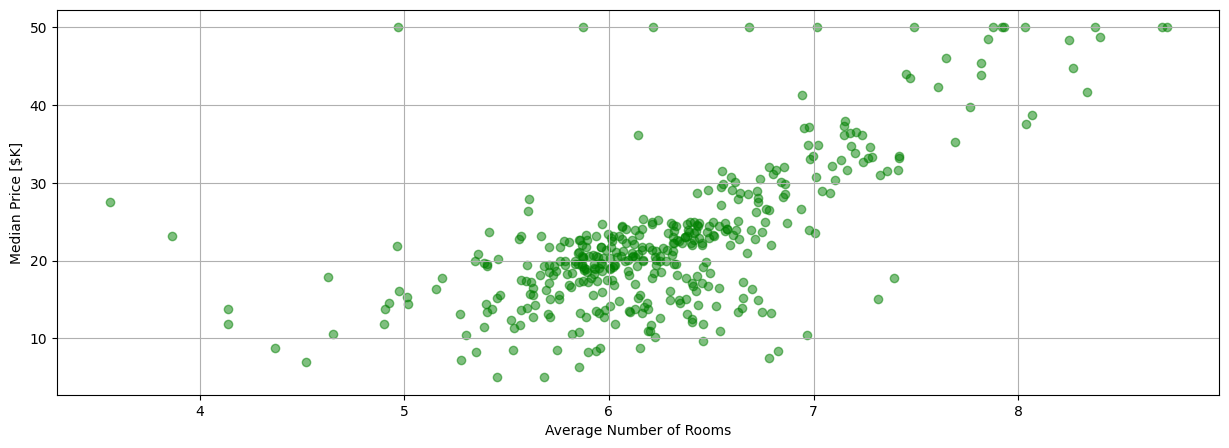

In [5]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

In [17]:
model = Sequential([
    Input(shape=(1,)),
    Dense(units=1)
])

# Define the model consisting of a single neuron.

# Display a summary of the model architecture.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")


In [19]:
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 370.0051 - val_loss: 467.3001
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 341.8501 - val_loss: 441.6814
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320.3044 - val_loss: 417.7154
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 300.0409 - val_loss: 394.7058
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 280.6605 - val_loss: 372.5553
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 262.1059 - val_loss: 351.2488
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 244.3675 - val_loss: 330.7832
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 227.4426 - val_loss: 311.1573
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 211.3290 - val_loss: 292.3698
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 196.0249 - val_loss: 274.4198
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 181.5279 - val_loss: 257.3058
Epoch 12/101
18/18 

In [20]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

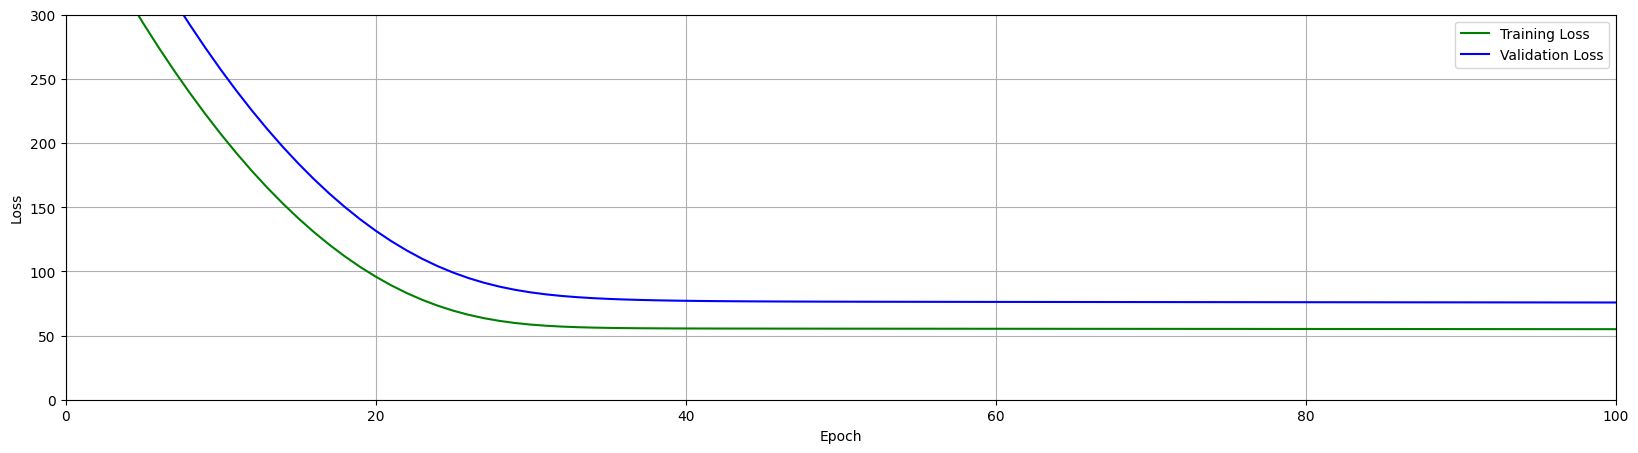

In [21]:
plot_loss(history)


In [11]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = np.array([3, 4, 5, 6, 7])
y_pred = model.predict(x)
for idx in range(len(x)):
    predicted_price = y_pred[idx].item()
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(predicted_price * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted price of a home with 3 rooms: $12.1K
Predicted price of a home with 4 rooms: $15.2K
Predicted price of a home with 5 rooms: $18.3K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.4K


In [12]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [13]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

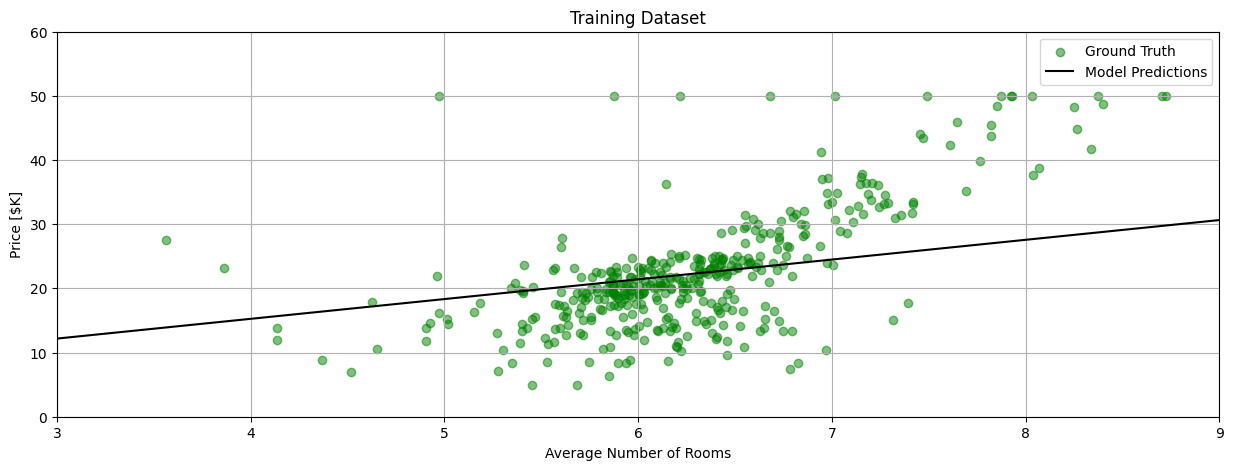

In [14]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')


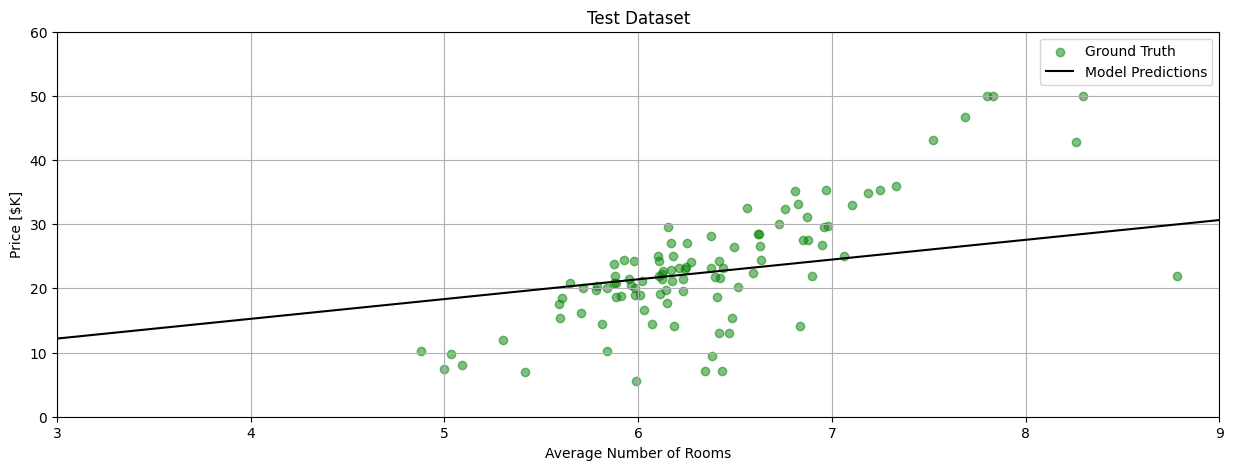

In [15]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')
